In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [5]:
#Passo a passo de um tratamento de dados do cientista

In [6]:
#1)Lendo dataframe

df= pd.read_csv('/content/CHURN_CREDIT_MOD14.csv', delimiter=';')
df.head(10)

<ipython-input-6-cce26c1a2895>:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/CHURN_CREDIT_MOD14.csv', delimiter=';')


,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,15813451,Fleetwood-Smith,677,Spain,Male,18.0,5,134796.87,2,1.0,0.0,114858.9,0.0
1,15641688,Collier,644,Spain,Female,18.0,7,0.00,1,0.0,1.0,74564.41,0.0
2,15757821,Burgess,641,Spain,Male,18.0,1,0.00,2,0.0,1.0,41542.95,0.0
3,15673180,Onyekaozulu,826,Spain,Male,18.0,2,0.00,2,0.0,1.0,16245.25,0.0
4,15664543,Tuan,774,Spain,Female,18.0,1,185891.54,1,1.0,0.0,175072.41,0.0
5,15673180,Onyekaozulu,688,Spain,Female,18.0,2,0.00,2,1.0,0.0,98349.13,0.0
6,15641688,Collier,803,Spain,Male,18.0,6,0.00,1,0.0,0.0,59645.24,1.0
7,15672940,Yevseyev,578,Spain,Female,18.0,8,71843.15,2,0.0,1.0,112649.22,0.0
8,15694192,Nwankwo,598,Spain,Male,18.0,6,0.00,2,0.0,1.0,173783.38,0.0
9,15585867,Iroawuchi,624,Spain,Female,18.0,6,0.00,2,0.0,1.0,117038.96,0.0


In [7]:
#2)Trazendo um overview sobre todo o dataframe, como contagem de linhas, se tem valores nulos e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CustomerId     100000 non-null  int64  
 1   Sobrenome      100000 non-null  object 
 2   Credit_Score   100000 non-null  int64  
 3   Pais           100000 non-null  object 
 4   Genero         99990 non-null   object 
 5   Idade          99794 non-null   float64
 6   Tempo_Credito  100000 non-null  int64  
 7   Balance        100000 non-null  float64
 8   Qtd_Produtos   100000 non-null  int64  
 9   Possui_Cartao  100000 non-null  float64
 10  Membro_Ativo   100000 non-null  float64
 11  Salario_Anual  100000 non-null  object 
 12  Churn          99911 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 9.9+ MB


In [8]:
df.describe()

,CustomerId,Credit_Score,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Churn
count,1.000000e+05,100000.000000,99794.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99911.000000
mean,1.569192e+07,656.484210,38.132648,5.027490,55543.789399,1.554040,0.755360,0.497470,0.211148
std,7.138467e+04,80.277854,8.824495,2.806908,62784.052013,0.547634,0.429876,0.499996,0.408125
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.563298e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.569016e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,0.000000
75%,1.575667e+07,710.000000,42.000000,7.000000,119839.705000,2.000000,1.000000,1.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,1.000000


In [9]:
#3) notamos na etapa 2 que algumas colunas estao com o dtype erroneos como salario anual como object, churn como float, para isso precisamos converter

#Para converter a coluna Salario_Anual  para float, precisamos identificar a coluna do df a ser modificado e em seguida
#aplicamos o astyoe e dentro do parametro o tipo de dado que queremos

#df['Salario_Anual'] = df['Salario_Anual'].astype(float)
#df.info()


In [10]:
#encontramos um erro na tabela could not convert string to float: '38.190.168', pois nao consegue interpretar os valores de float com .
#assim vamos remover o que for ponto para vazio
#df['Salario_Anual'] = df['Salario_Anual'].str.replace('.', '', regex=False)

#Fazendo conversão para float
#df['Salario_Anual']= df['Salario_Anual'].astype(float)
#df.dtypes

In [11]:
#deu o erro Cannot convert non-finite values (NA or inf) to integer ou seja nao consegue faer a conversão por valores infinitos ou faltantes

In [12]:
#identificando valores nulos em todo dataframe
df.isnull().values.any()

True

#contar valores nulos em cada coluna, mas dessa forma nao fica tao claro

In [13]:
df.isnull().sum()

,0
CustomerId,0
Sobrenome,0
Credit_Score,0
Pais,0
Genero,10
Idade,206
Tempo_Credito,0
Balance,0
Qtd_Produtos,0
Possui_Cartao,0


Observando valores nulos em porcentagem

In [14]:
#contar valores nulos em cada coluna por porcentagem fica mais claro de entender
#trazemos a soma dos nulos e usamos len para contar os registros e multiplicar por 100 para termos a %

(df.isnull().sum()/ len(df)) * 100



,0
CustomerId,0.000
Sobrenome,0.000
Credit_Score,0.000
Pais,0.000
Genero,0.010
Idade,0.206
Tempo_Credito,0.000
Balance,0.000
Qtd_Produtos,0.000
Possui_Cartao,0.000


OUTROS TIPOS DE TRATAMENTO

In [15]:
#Para transformar todos os dados da coluna como caixa baixa ou minusculo se quiser maisculo poe upper
df['Pais'] = df['Pais'].str.lower()
df['Pais'].unique()

array(['spain', 'germany', 'germani', 'france'], dtype=object)

Para substituir colunas escritas erradas

In [16]:
#Para isso usamos a função replace
df['Pais'] = df['Pais'].replace('germani', 'germany')
df['Pais'].unique() #verifica se substituiu

array(['spain', 'germany', 'france'], dtype=object)

Precisamos manter os nomes das colunas padronizadas, ex, quase todas tem nome em portugues, porem a coluna balance está em ingles

In [17]:
#Para isso usamos a função rename
df.rename(columns={'Balance': 'Balanco'}, inplace=True)
df.head() #ver se alterou

,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,15813451,Fleetwood-Smith,677,spain,Male,18.0,5,134796.87,2,1.0,0.0,114858.9,0.0
1,15641688,Collier,644,spain,Female,18.0,7,0.00,1,0.0,1.0,74564.41,0.0
2,15757821,Burgess,641,spain,Male,18.0,1,0.00,2,0.0,1.0,41542.95,0.0
3,15673180,Onyekaozulu,826,spain,Male,18.0,2,0.00,2,0.0,1.0,16245.25,0.0
4,15664543,Tuan,774,spain,Female,18.0,1,185891.54,1,1.0,0.0,175072.41,0.0


É importante antes de iniciar a analise remover todas as colunas que não serão importantes!

In [18]:
df.drop(columns=['Sobrenome'], inplace=True)
df.drop(columns=['CustomerId'], inplace=True)

In [19]:
df.head() #ver se alterou

,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,677,spain,Male,18.0,5,134796.87,2,1.0,0.0,114858.9,0.0
1,644,spain,Female,18.0,7,0.00,1,0.0,1.0,74564.41,0.0
2,641,spain,Male,18.0,1,0.00,2,0.0,1.0,41542.95,0.0
3,826,spain,Male,18.0,2,0.00,2,0.0,1.0,16245.25,0.0
4,774,spain,Female,18.0,1,185891.54,1,1.0,0.0,175072.41,0.0


#Tratando coluna genero

In [20]:
df[df['Genero'].isnull()]

,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
61074,667,france,NaN,33.0,3,0.00,2,1.0,1.0,171757.57,0.0
61075,642,france,NaN,33.0,4,150507.21,1,1.0,1.0,125439.73,0.0
61076,646,france,NaN,33.0,3,137148.68,1,1.0,0.0,92381.01,0.0
61077,593,france,NaN,33.0,4,0.00,2,1.0,1.0,99828.45,0.0
61078,653,france,NaN,33.0,6,0.00,2,1.0,0.0,113483.96,0.0
61079,585,france,NaN,33.0,2,97565.74,1,0.0,0.0,114775.53,0.0
61080,758,france,NaN,33.0,9,119782.77,1,1.0,0.0,132418.73,0.0
61081,679,france,NaN,33.0,7,107499.24,1,1.0,0.0,126715.85,0.0
61082,748,france,NaN,33.0,6,0.00,2,1.0,1.0,147557.71,0.0
61083,516,france,NaN,33.0,3,0.00,1,1.0,1.0,137835.82,0.0


In [21]:
#conforme analisamos nos valores nulos a coluna genero representa um valor muito baixo, e como a base de dados e grande podemos excluir essa coluna

df.dropna(subset=['Genero'], inplace=True)
#inplace=True faz com que as alterações sejam feitas diretamente no dataframe original

In [22]:
#consultando se o drop deu certo
df['Genero'].isnull().sum()


0

Tratando Coluna idade


A coluna idade tambem se refere a uma porcentagem bem baixa entao podemos dropar

In [23]:
df.dropna(subset=['Idade'], inplace=True)

In [24]:
#consultando se o drop deu certo
df['Idade'].isnull().sum()

0

#Tratando salario

In [25]:
#Para termos certeza teremos que analizar a fundo a distribuição dos dados
df['Salario_Anual'] = pd.to_numeric(df['Salario_Anual'], errors='coerce')
df = df.dropna(subset=['Salario_Anual'])
print(df['Salario_Anual'].mean())

112543.07301564395


A média dos salario anual é de 10.2 Milhões

Para termos certeza precisamos analisar a mediana

In [26]:
df['Salario_Anual'].median()

118024.1

A mediana esta proximo da media,c om 10.7 Milhoões. Esse é um bom sinal, em um primeiro momento os dados parecem bem distribuidos.

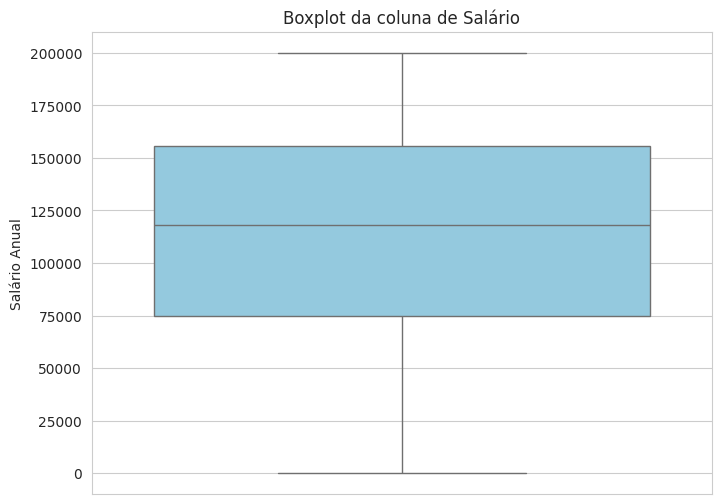

In [27]:
#É uma função da biblioteca Seaborn que define o estilo estético dos gráficos, 'whitegrid' é um dos estilos disponiveis

sns.set_style('whitegrid')

#Plota o boxplot da coluna de salário
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='Salario_Anual', color='skyblue')
plt.title('Boxplot da coluna de Salário')
plt.ylabel('Salário Anual')
plt.show()

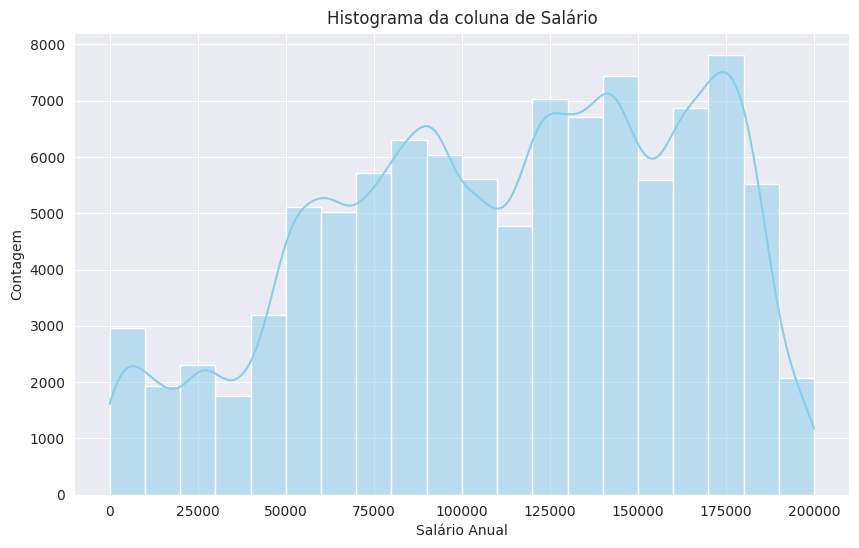

In [28]:
sns.set_style('darkgrid')

#plotando um histograma dos sálarios para analisar a distribuição dos dados

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Salario_Anual', bins=20, kde=True, color='skyblue')
plt.title('Histograma da coluna de Salário')
plt.xlabel('Salário Anual')
plt.ylabel('Contagem')
plt.show()

Nós identificamos que existe um outlier. Para termos uma mediana mais justa é interessante calcularmos ela sem esse outlier.

**Então vamos trazer a mediana dos salarios removendo salarios acima de 2 milhões**

In [29]:
salarios_abaixo_2milhoes = df[df['Salario_Anual'] < 2000000]
salarios_abaixo_2milhoes['Salario_Anual'].median()

118024.1

In [30]:
mediana_salarios_abaixo_2milhoes=df[df['Salario_Anual'] < 2000000] ['Salario_Anual'].median()

#Substitui os valores faltantes na coluna de sálario pela mediana
df['Salario_Anual'].fillna(mediana_salarios_abaixo_2milhoes, inplace=True)

<ipython-input-30-f2e697ec890c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salario_Anual'].fillna(mediana_salarios_abaixo_2milhoes, inplace=True)


In [31]:
df['Salario_Anual'].isnull().sum()

0

In [32]:
df['Salario_Anual'].median()

118024.1

Vemos que a mediana cai sem a presença do outlier. Então substituiremos os dados faltantes pelo valor da mediana sem os outliers.
Caso não houvesse outlier, poderiamos substituir diretamente pela mediana.

#Agora transformaremos a coluna Churn

<Axes: xlabel='Churn', ylabel='Count'>

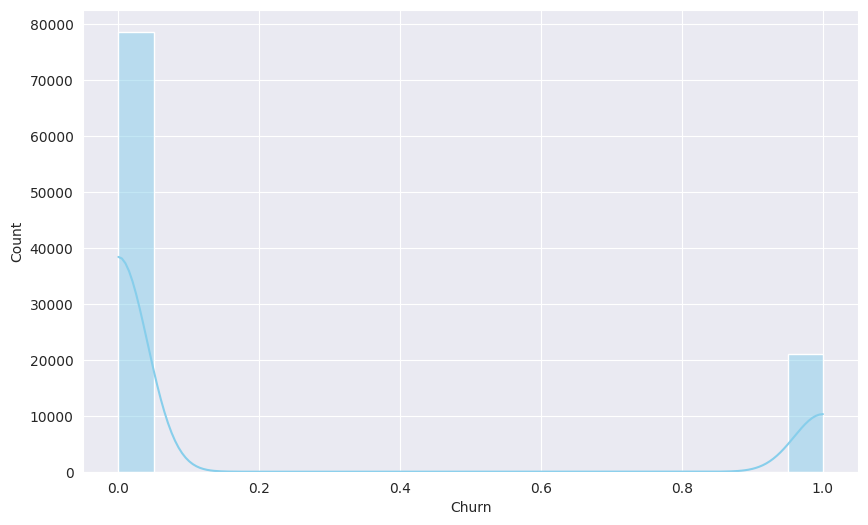

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Churn', bins=20, kde=True, color='skyblue')


Fica evidente que temos muito mais casos de Não churn que seria 0 do que churn  que seria 1.

In [34]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0.0,78.854042
1.0,21.145958


In [35]:
df[df['Churn'].isnull()]

,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
406,604,spain,Female,23.0,6,0.00,1,1.0,0.0,122964.18,NaN
407,640,spain,Male,23.0,4,0.00,2,0.0,1.0,132467.54,NaN
408,605,spain,Male,23.0,5,181671.16,2,1.0,1.0,122268.75,NaN
409,712,spain,Female,23.0,7,110805.42,2,0.0,1.0,126253.54,NaN
410,673,spain,Female,23.0,1,0.00,2,1.0,1.0,84460.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...
60582,675,france,Male,33.0,2,0.00,2,1.0,0.0,45348.08,NaN
60583,711,france,Male,33.0,7,0.00,2,1.0,1.0,28667.72,NaN
60584,712,france,Male,33.0,4,0.00,2,1.0,0.0,54949.47,NaN
60585,696,france,Male,33.0,2,111432.14,1,1.0,0.0,83551.19,NaN


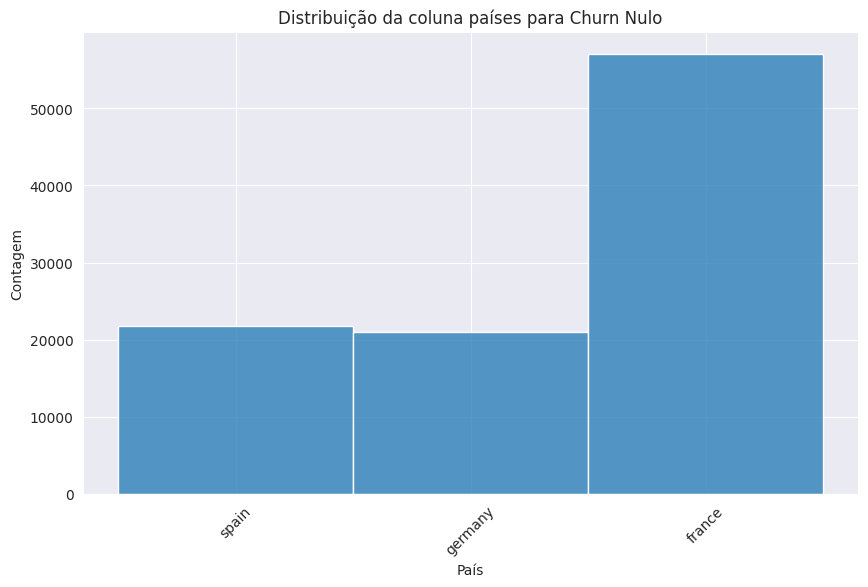

In [36]:
#Seleciona todas as linhas onde a coluna 'Churn' é nula
df_churn_nulo= df[df['Churn'].isnull()]

#Plotando a districuição dis paises
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Pais')
plt.title('Distribuição da coluna países para Churn Nulo')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

Vamos remover as linhas nulas para evitar vies no modelo

In [37]:
df.dropna(subset=['Churn'], inplace=True)

In [38]:
df['Churn'].isnull().sum()

0

In [39]:
df.isnull().sum()

,0
Credit_Score,0
Pais,0
Genero,0
Idade,0
Tempo_Credito,0
Balanco,0
Qtd_Produtos,0
Possui_Cartao,0
Membro_Ativo,0
Salario_Anual,0


#Atividade módulo 20

In [41]:
from sklearn.model_selection import train_test_split

# Separar X e y
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Dividir em treino e teste (80% treino, 20% teste, por exemplo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Verificar se o número de linhas de X e y é o mesmo
assert X_train.shape[0] == y_train.shape[0], "Número de linhas em X_train e y_train não corresponde!"
assert X_test.shape[0] == y_test.shape[0], "Número de linhas em X_test e y_test não corresponde!"

# 2. Verificar se X contém apenas as variáveis corretas (sem 'Churn')
assert "Churn" not in X_train.columns, "'Churn' não deve estar em X!"

# 3. Verificar balanceamento de y na base de teste
print("Distribuição da variável alvo (y) no conjunto de teste:")
print(y_test.value_counts(normalize=True))

# Exibir formas das bases
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Distribuição da variável alvo (y) no conjunto de teste:
Churn
0.0    0.788537
1.0    0.211463
Name: proportion, dtype: float64
X_train: (79765, 10), X_test: (19942, 10)
y_train: (79765,), y_test: (19942,)


In [42]:
print(y_train.head())
print(y_test.head())

82847    0.0
75028    0.0
71812    0.0
11166    0.0
17626    0.0
Name: Churn, dtype: float64
37005    0.0
19484    1.0
98067    0.0
57024    0.0
14846    0.0
Name: Churn, dtype: float64


In [61]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, classification_report

# Transformador para One-Hot Encoding
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first"), categorical_features)
], remainder="passthrough")  # Mantém as colunas numéricas como estão

# objeto SMOTE para balanceamento das classes
smote = SMOTE(random_state=42)

# Pipeline com pré-processamento, SMOTE e Naive Bayes (usando o Pipeline do imblearn)
nb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("smote", smote),  # SMOTE é uma etapa intermediária no pipeline
    ("classifier", GaussianNB())
])

# Treinar o modelo
nb_pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = nb_pipeline.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
recall_optimal = recall_score(y_test, y_pred, average='macro')  # Use y_pred, não y_pred_optimal

print(f"Acurácia do modelo Naive Bayes: {accuracy:.4f}")
print(f"Recall (macro) do modelo Naive Bayes: {recall_optimal:.4f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))



Acurácia do modelo Naive Bayes: 0.7256
Recall (macro) do modelo Naive Bayes: 0.7080

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.90      0.74      0.81     15725
         1.0       0.41      0.68      0.51      4217

    accuracy                           0.73     19942
   macro avg       0.65      0.71      0.66     19942
weighted avg       0.79      0.73      0.75     19942



Com base na acuracia 72,56% das previsões feitas pelo modelo foram corretas.

O modelo apresenta boa precisão para a classe não churn (90%) e um recall razoável (74%), mas tem um desempenho bem inferior na classe churn.

A precisão para churn é baixa (41%), o que significa que muitas das previsões para churn estão erradas. Porém, o recall para churn é melhor (68%), indicando que ele é capaz de identificar uma boa parte dos churns, embora ainda perca muitos.


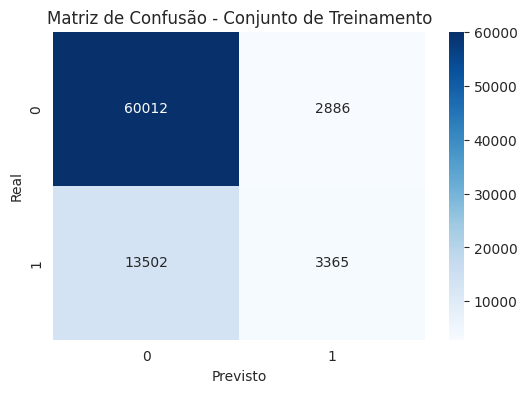

In [55]:
# Fazer previsões no conjunto de treinamento
y_train_pred = nb_pipeline.predict(X_train)

# Matriz de Confusão para o conjunto de treinamento
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Conjunto de Treinamento")
plt.show()


In [56]:
# Verificar o balanceamento da variável alvo no conjunto de teste
print("\nDistribuição da variável alvo no conjunto de teste (y_test):")
print(y_test.map({0.0: "Não Churn", 1.0: "Churn"}).value_counts())


Distribuição da variável alvo no conjunto de teste (y_test):
Churn
Não Churn    15725
Churn         4217
Name: count, dtype: int64


Em relação aos resultados que obtive:
A acurácia nos dados de teste (0.73) está razoável, mas talvez um pouco mais baixa do que nos dados de treinamento.

Recall (macro): O recall de 0.71 indica que o modelo, de maneira geral, está lidando bem com as classes em termos de captura, principalmente considerando o uso do SMOTE.

F1-Score: O f1-score para a classe minoritária (churn) de 0.51 mostra que o modelo tem dificuldade em classificar corretamente todos os exemplos de churn, o que pode ser um reflexo da disparidade na distribuição das classes.

O projeto desenvolvido visa utilizar o algoritmo de Naive Bayes para prever o churn (desistência) dos clientes em uma base de dados de crédito. O objetivo principal é identificar padrões de comportamento entre as variáveis disponíveis, como idade, saldo, tipo de produtos e outros atributos financeiros, para prever se um cliente provavelmente irá deixar de usar os serviços da empresa. Para melhorar a precisão do modelo, apliquei técnicas como o SMOTE para balanceamento das classes e One-Hot Encoding para tratar variáveis categóricas. Com isso, busquei otimizar as previsões para ajudar a empresa a identificar clientes em risco e, assim, adotar estratégias para retenção.